# Airbnb en Nueva York

Una empresa ha recolectado la información del alquiler de viviendas en Nueva York a través de la aplicación Airbnb durante el año 2019. Este conjunto de datos se utilizó para entrenar modelos de Machine Learning durante ese año, en una competición en abierto.

Ahora lo utilizaremos para llevar a cabo un estudio acerca de las variables que componen el dataset a fin de comprenderlo y obtener conclusiones sobre él.

##### Pasos que tenemos que seguir para llevar a cabo el estudio en profundidad:

- planteamiento del problema y recopilación de datos

- Exploración y limpieza de datos

- Análisis de variables univariadas

- Análisis de variables multivariadas

- ingeniería de funciones

- selección de funciones

Después de la implementación y adopción de estos pasos, estaremos listos para entrenar el modelo.

### Paso 1: Carga del conjunto de datos
Puedes descargar el conjunto de datos directamente desde Kaggle.com o en el siguiente enlace: https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv. Almacena los datos en crudo en la carpeta ./data/raw.


(Opcional, para descargar el archivo.csv desde la terminal: wget https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv.)

(Opcional, para mover a la carpeta src desde la terminal: mv AB_NYC_2019.csv ./data/raw/)


* Buscamos las viviendas que tengan mejores atributos en relación al precio.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Importaremos el conjunto de datos para empezar a trabajar con él:
Abnb_df = pd.read_csv("/workspaces/machine-learning-python-template-pilarzarco/data/AB_NYC_2019.csv")

# Dividir el conjunto de datos en entrenamiento y prueba
train_data, test_data = train_test_split(Abnb_df, test_size=0.2, random_state=42)

# Guardar los conjuntos de entrenamiento y prueba como archivos CSV
train_data.to_csv("Abnb_train.csv", index=False)
test_data.to_csv("Abnb_test.csv", index=False)

Abnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Paso 2: Realiza un EDA completo
Este paso es vital para asegurar que nos quedamos con las variables estrictamente necesarias y eliminamos las que no son relevantes o no aportan información.
Asegúrate de dividir convenientemente el conjunto de datos en train y test.

In [3]:
# Dimensiones del Data Frame
Abnb_df.shape

(48895, 16)

In [4]:
# Información sobre el tipo de datos de las columnas, la cantidad de valores no nulos y el uso de memoria
Abnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

<span style="text-decoration: underline;">Conclusión:</span>
* Hay un total de 48.894 Filas que corresponden a viviendas en alquiler, y 16 Columnas que son los atributos de dichas viviendas.
* Entre dichos atributos se encuentra 'price' que va a ser nuestro objeto principal del análisis.
* Las variables 'last_review' y 'reviews_per_month' tienen 10.000 instancias menos, por lo que contienen 10.000 valores nulos, y también tenemos 'name' y 'host_name' que tienen unos 20, el resto no tiene valores nulos.
* Los datos tienen 10 características numéricas y características 6 categóricas.


In [5]:
# Eliminar duplicados si los hubiera
duplicates = Abnb_df[Abnb_df.duplicated()]

# Si deseas contar el número total de filas duplicadas
num_duplicates = Abnb_df.duplicated().sum()
print(f"Cantidad de filas duplicadas:", num_duplicates)

# Si deseas eliminar las filas duplicadas del DataFrame original
# Abnb_df_no_duplicates = Abnb_df.drop_duplicates()


Cantidad de filas duplicadas: 0


In [6]:
# Eliminar columnas que no deseamos para que el análisis sea más fácil de entender e interpretar
Abnb_df = Abnb_df.drop(["host_name", "name", "last_review", "neighbourhood", "host_id"], axis=1, inplace=False)
Abnb_df.head()

,id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


#### - Análisis de variables univariante

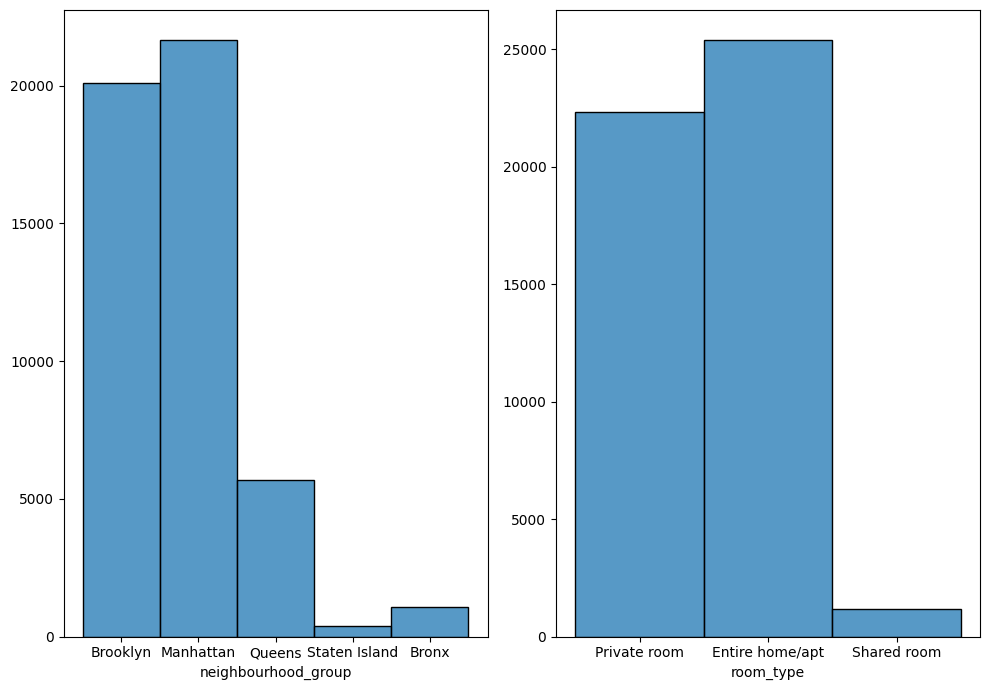

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un histograma múltiple sobre variables categóricas
fig, axis = plt.subplots(1, 2, figsize=(10, 7))

sns.histplot(ax=axis[0], data=Abnb_df, x="neighbourhood_group").set(ylabel=None)
sns.histplot(ax=axis[1], data=Abnb_df, x="room_type").set(ylabel=None)

plt.tight_layout()
plt.show()

<span style="text-decoration: underline;">Conclusión:</span>
* En los barrios de Brooklyn y Manhattan hay bastantes más viviendas en alquiler que en las demás, con una cantidad muy elevada en comparación.
* En las tipologías de vivienda destacan la 'habitación privada' y 'casa entera o apartamento', dejando a un lado muy por debajo a la 'habitación compartida'.
* Tenemos dos histogramas sesgados a la derecha, lo que quiere decir que los datos en esa posición son muy poco frecuentes.
* Son histogramas asimétricos.

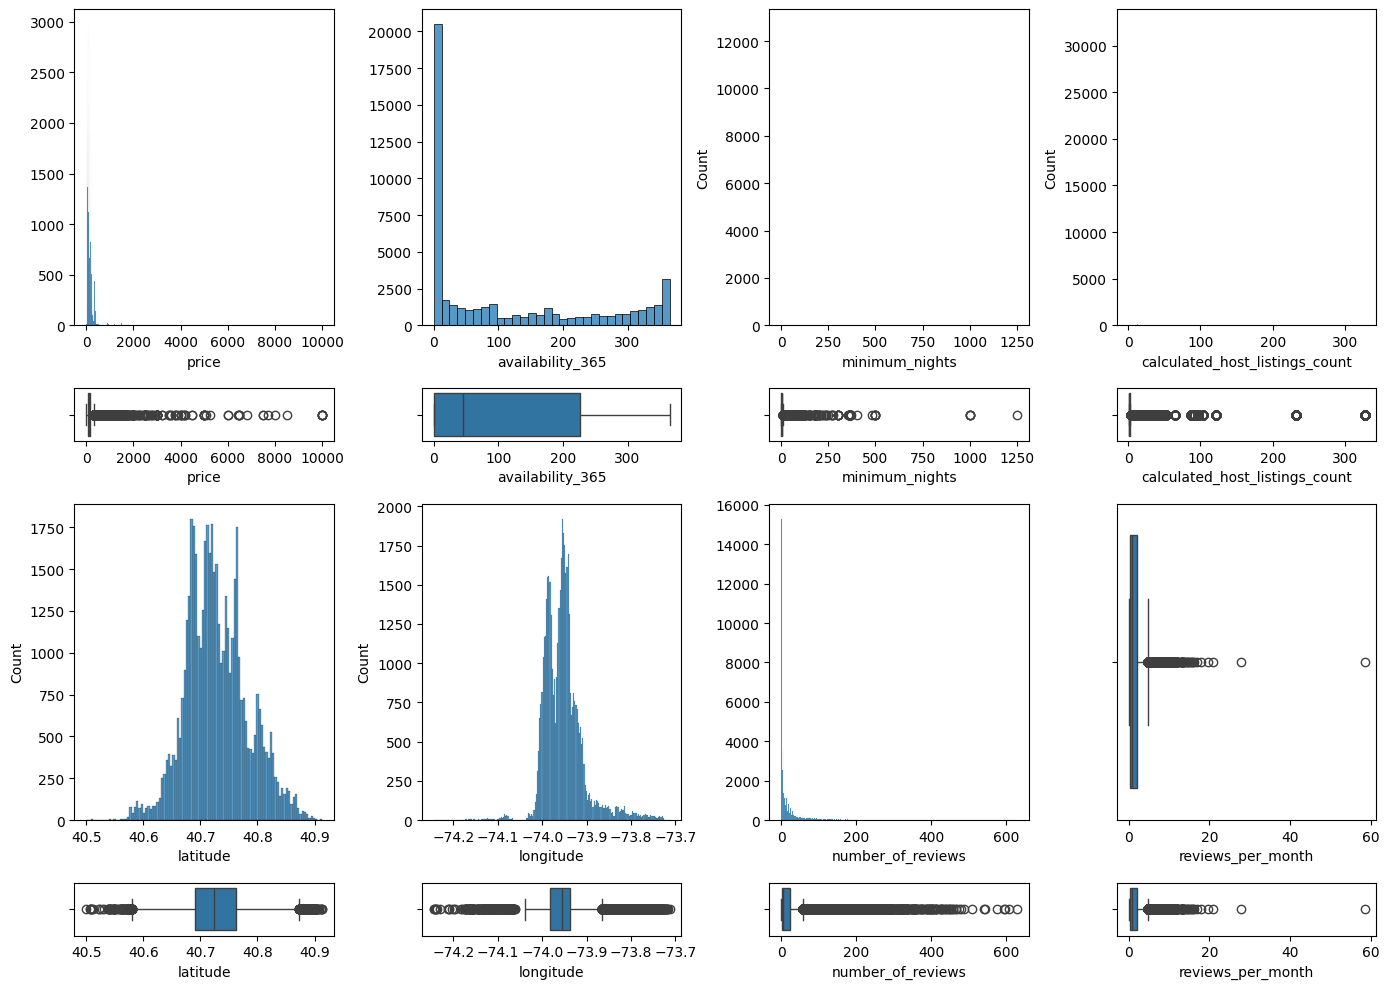

In [8]:
# Crear una figura múltiple con histogramas y diagramas de caja sobre variables numéricas
fig, axis = plt.subplots(4, 4, figsize = (14, 10), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

sns.histplot(ax=axis[0, 0], data=Abnb_df, x="price").set(ylabel=None)
sns.boxplot(ax=axis[1, 0], data=Abnb_df, x="price")

sns.histplot(ax=axis[0, 1], data=Abnb_df, x="availability_365").set(ylabel=None)
sns.boxplot(ax=axis[1, 1], data=Abnb_df, x="availability_365")

sns.histplot(ax=axis[0, 2], data=Abnb_df, x="minimum_nights")
sns.boxplot(ax=axis[1, 2], data=Abnb_df, x="minimum_nights")

sns.histplot(ax=axis[0, 3], data=Abnb_df, x="calculated_host_listings_count")
sns.boxplot(ax=axis[1, 3], data=Abnb_df, x="calculated_host_listings_count")

sns.histplot(ax=axis[2, 0], data=Abnb_df, x="latitude")
sns.boxplot(ax=axis[3, 0], data=Abnb_df, x="latitude")

sns.histplot(ax=axis[2, 1], data=Abnb_df, x="longitude")
sns.boxplot(ax=axis[3, 1], data=Abnb_df, x="longitude")

sns.histplot(ax=axis[2, 2], data=Abnb_df, x="number_of_reviews").set(ylabel=None)
sns.boxplot(ax=axis[3, 2], data=Abnb_df, x="number_of_reviews")

sns.boxplot(ax=axis[2, 3], data=Abnb_df, x="reviews_per_month").set(ylabel=None)
sns.boxplot(ax=axis[3, 3], data=Abnb_df, x="reviews_per_month")

plt.tight_layout()
plt.show()

<span style="text-decoration: underline;">Conclusión:</span>
* Las variables 'latitude' y 'longitude' son las únicas que tienen distribuciones estándar aunque con múltiples modas. 
Podriamos decir que por el momento no las consideramos variables importantes.
* En la variable 'availability_365' vemos una distrubucion asimétrica pero con unos valores normales, lineales
* El resto de variables tienen valores atípicos, están lejos de la distribución estándar y sus distribuciones son asimétricas, totalmente sesgadas a la izquierda.

* price
* availability_365
* minimum_nights
* calculated_host_listings_count
* number_of_reviews
* reviews_per_month

In [9]:
# Cambiamos los valores de las columnas con formato string por valores numéricos
Abnb_df['room_type_n'] = pd.factorize(Abnb_df['room_type'])[0]
Abnb_df['neighbourhood_group_n'] = pd.factorize(Abnb_df['neighbourhood_group'])[0]
Abnb_df.info() # Vemos como las columnas nuevas ya son numéricas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
 11  room_type_n                     48895 non-null  int64  
 12  neighbourhood_group_n           

<Axes: >

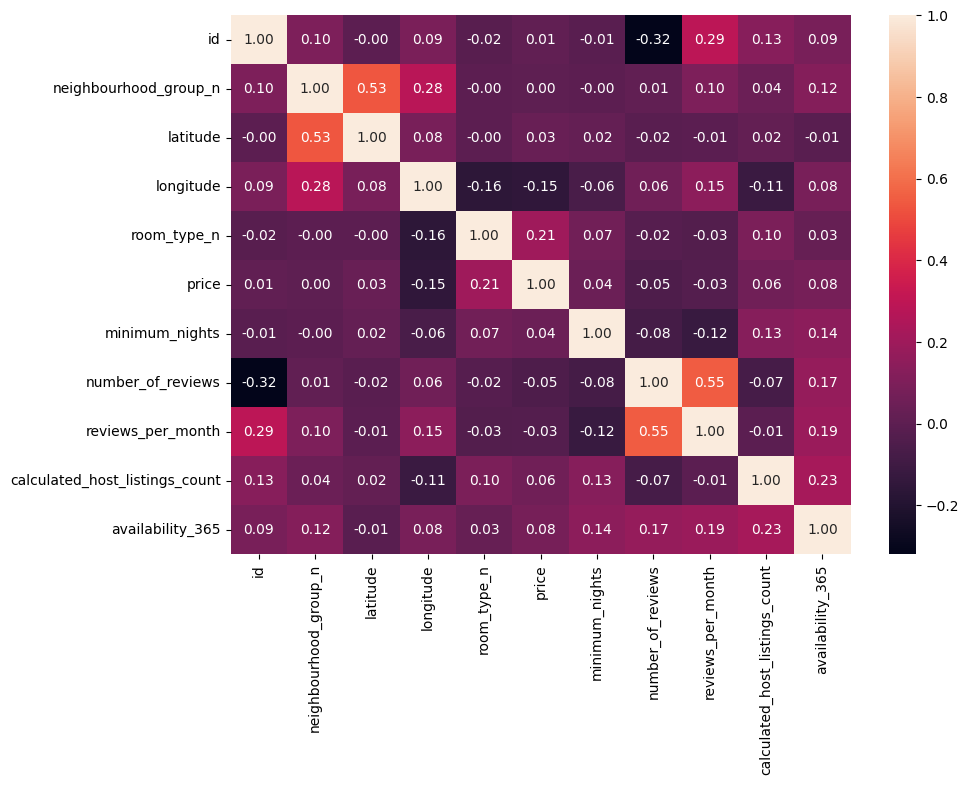

In [10]:
# Análisis de correlación
fig, axis = plt.subplots(figsize = (10, 7))
sns.heatmap(Abnb_df[["id", "neighbourhood_group_n", "latitude", "longitude", "room_type_n", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

<span style="text-decoration: underline;">Conclusión:</span>
*  
*
*
*
*
*

#### - Análisis de variables multivariante

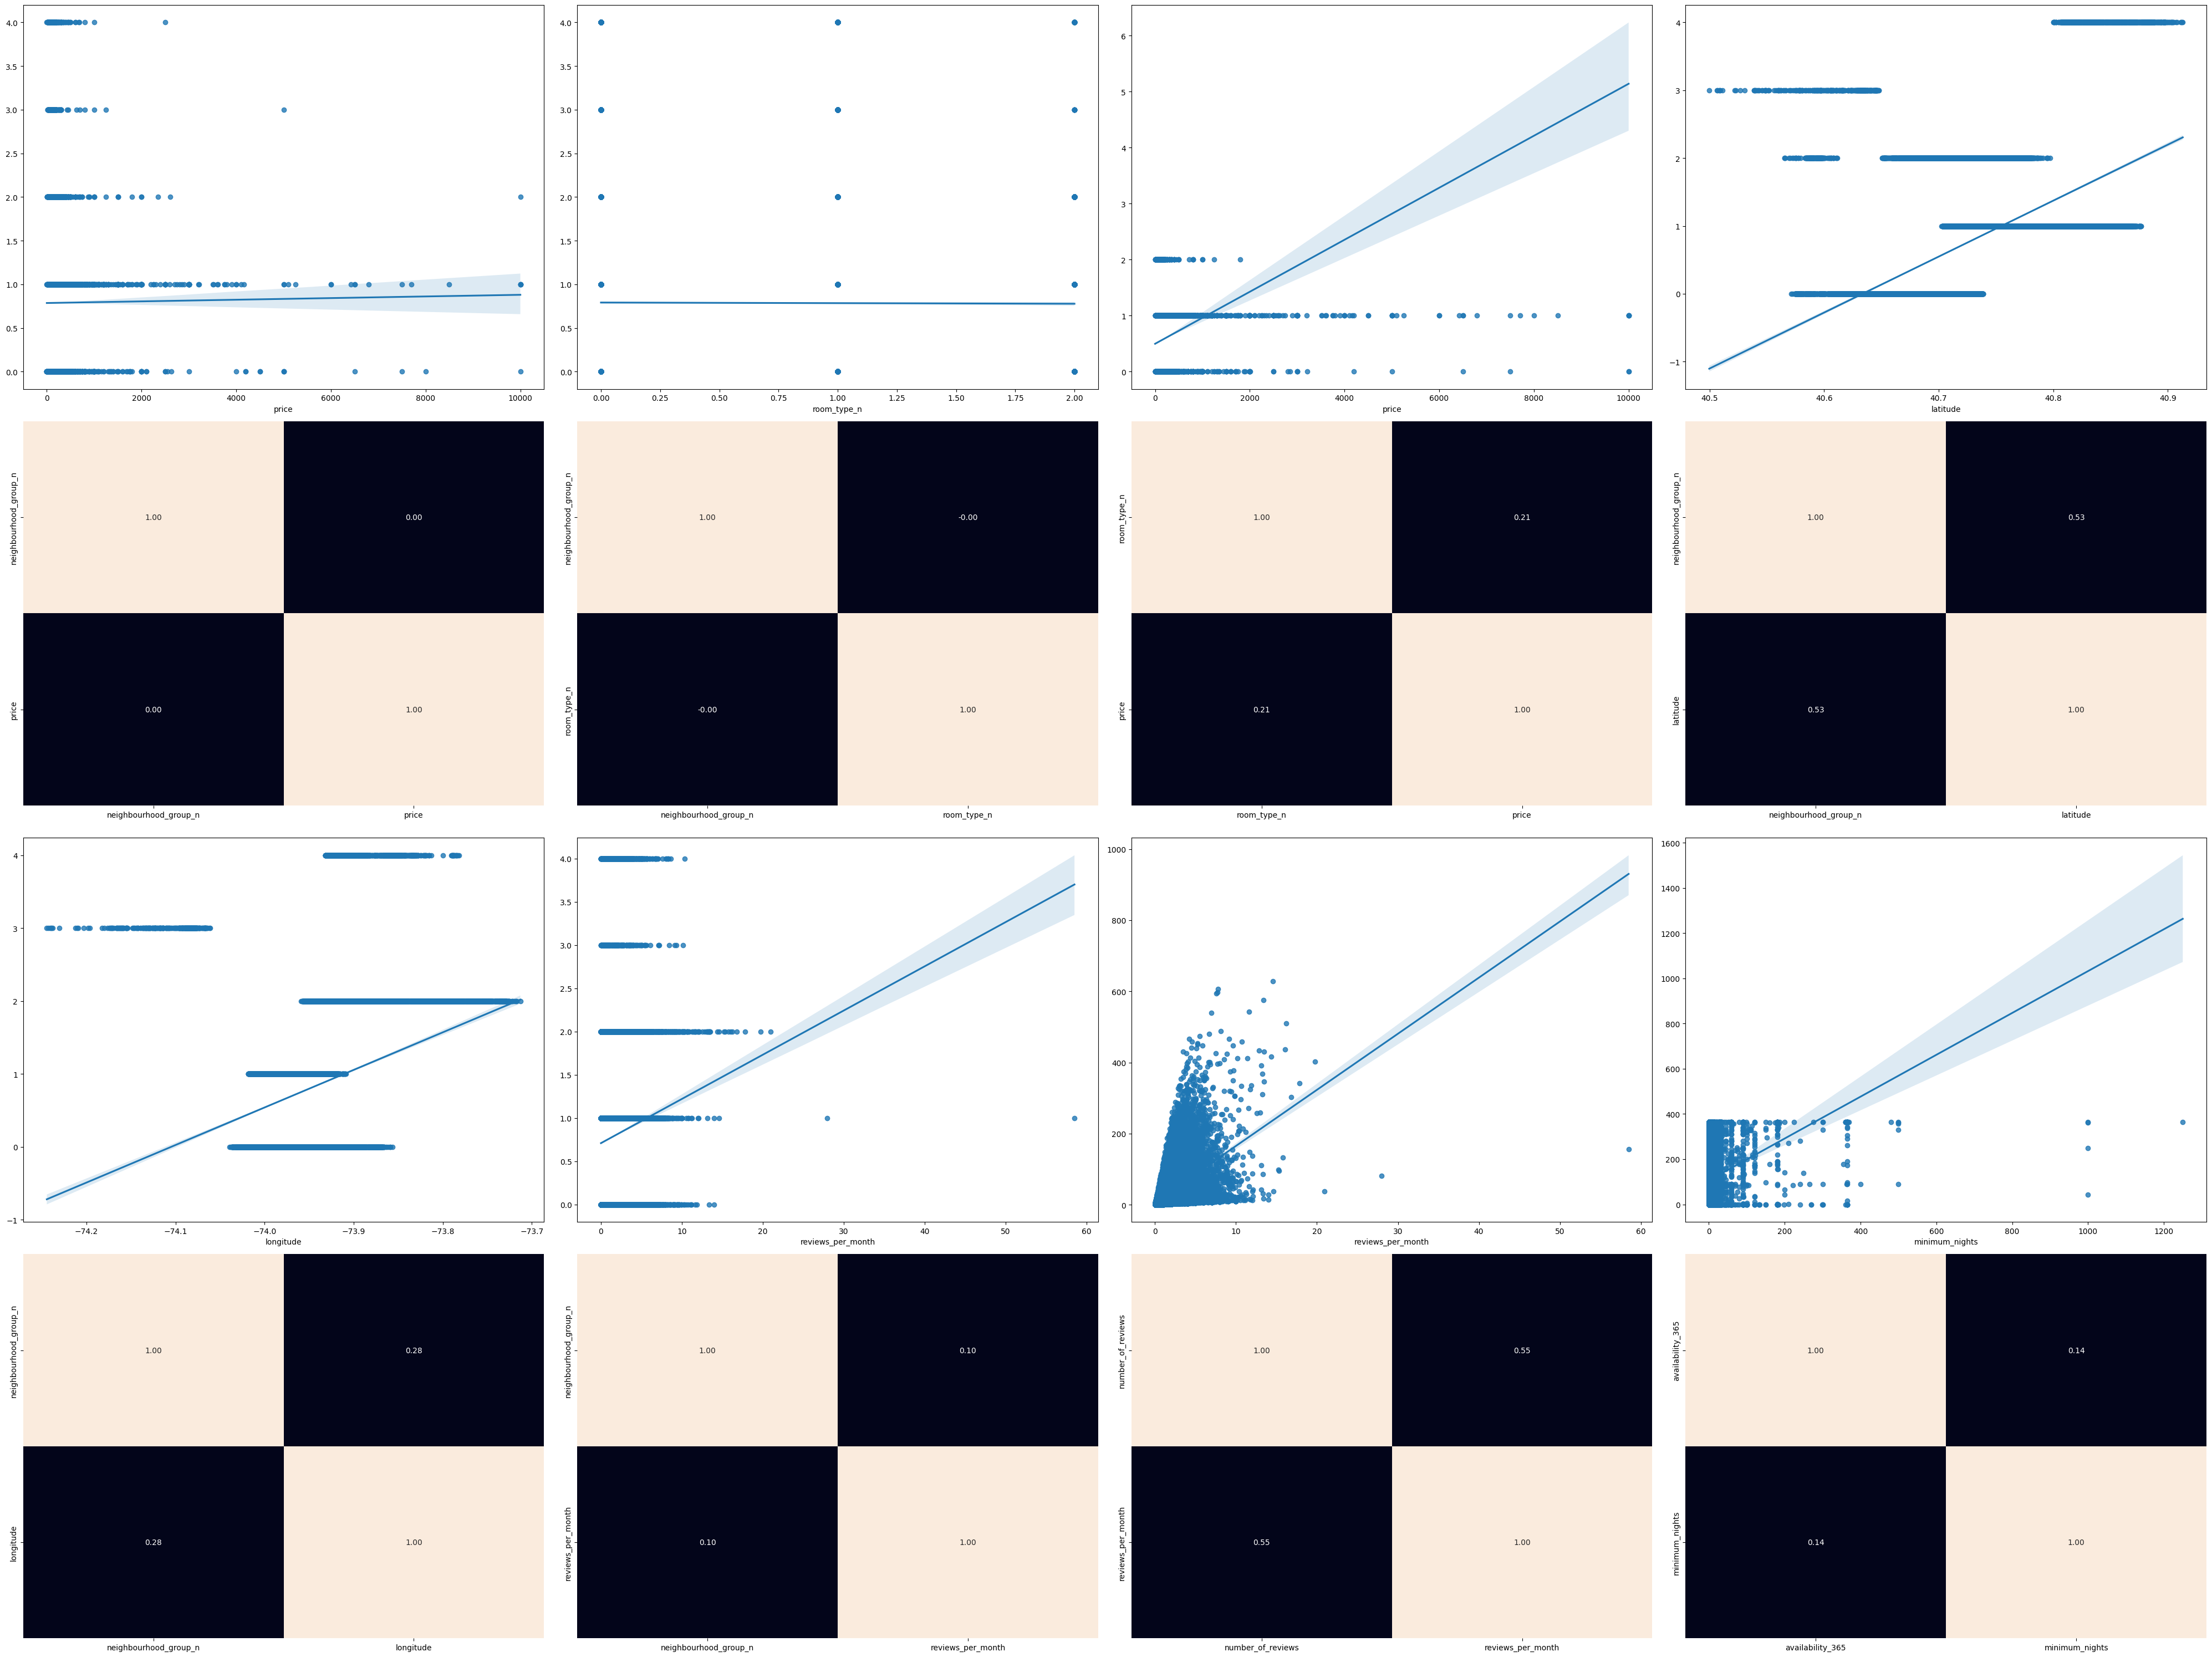

In [11]:
# Análisis numérico-numérico

fig, axis = plt.subplots(4, 4, figsize=(40,30))

# Crear un diagrama de dispersión múltiple

# Barrio y precio
sns.regplot(ax = axis[0, 0], data = Abnb_df, x = "price", y = "neighbourhood_group_n").set(ylabel=None)
sns.heatmap(Abnb_df[["neighbourhood_group_n", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

# Barrio y tipo de habitación
sns.regplot(ax = axis[0, 1], data = Abnb_df, x = "room_type_n", y = "neighbourhood_group_n").set(ylabel=None)
sns.heatmap(Abnb_df[["neighbourhood_group_n", "room_type_n"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

# Tipo de habitación y precio
sns.regplot(ax = axis[0, 2], data = Abnb_df, x = "price", y = "room_type_n").set(ylabel=None)
sns.heatmap(Abnb_df[["room_type_n", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2], cbar = False)

# Barrio y latitud
sns.regplot(ax = axis[0, 3], data = Abnb_df, x = "latitude", y = "neighbourhood_group_n").set(ylabel=None)
sns.heatmap(Abnb_df[["neighbourhood_group_n", "latitude"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 3], cbar = False)

# Barrio y longitud
sns.regplot(ax = axis[2, 0], data = Abnb_df, x = "longitude", y = "neighbourhood_group_n").set(ylabel=None)
sns.heatmap(Abnb_df[["neighbourhood_group_n", "longitude"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

# Barrio por opiniones por mes
sns.regplot(ax = axis[2, 1], data = Abnb_df, x = "reviews_per_month", y = "neighbourhood_group_n").set(ylabel=None)
sns.heatmap(Abnb_df[["neighbourhood_group_n", "reviews_per_month"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

# Número de opiniones por opiniones por mes
sns.regplot(ax = axis[2, 2], data = Abnb_df, x = "reviews_per_month", y = "number_of_reviews").set(ylabel=None)
sns.heatmap(Abnb_df[["number_of_reviews", "reviews_per_month"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 2], cbar = False)

# Mínimo de noches por disponibilidad
sns.regplot(ax = axis[2, 3], data = Abnb_df, x = "minimum_nights", y = "availability_365").set(ylabel=None)
sns.heatmap(Abnb_df[["availability_365", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 3], cbar = False)


plt.tight_layout()
plt.show()

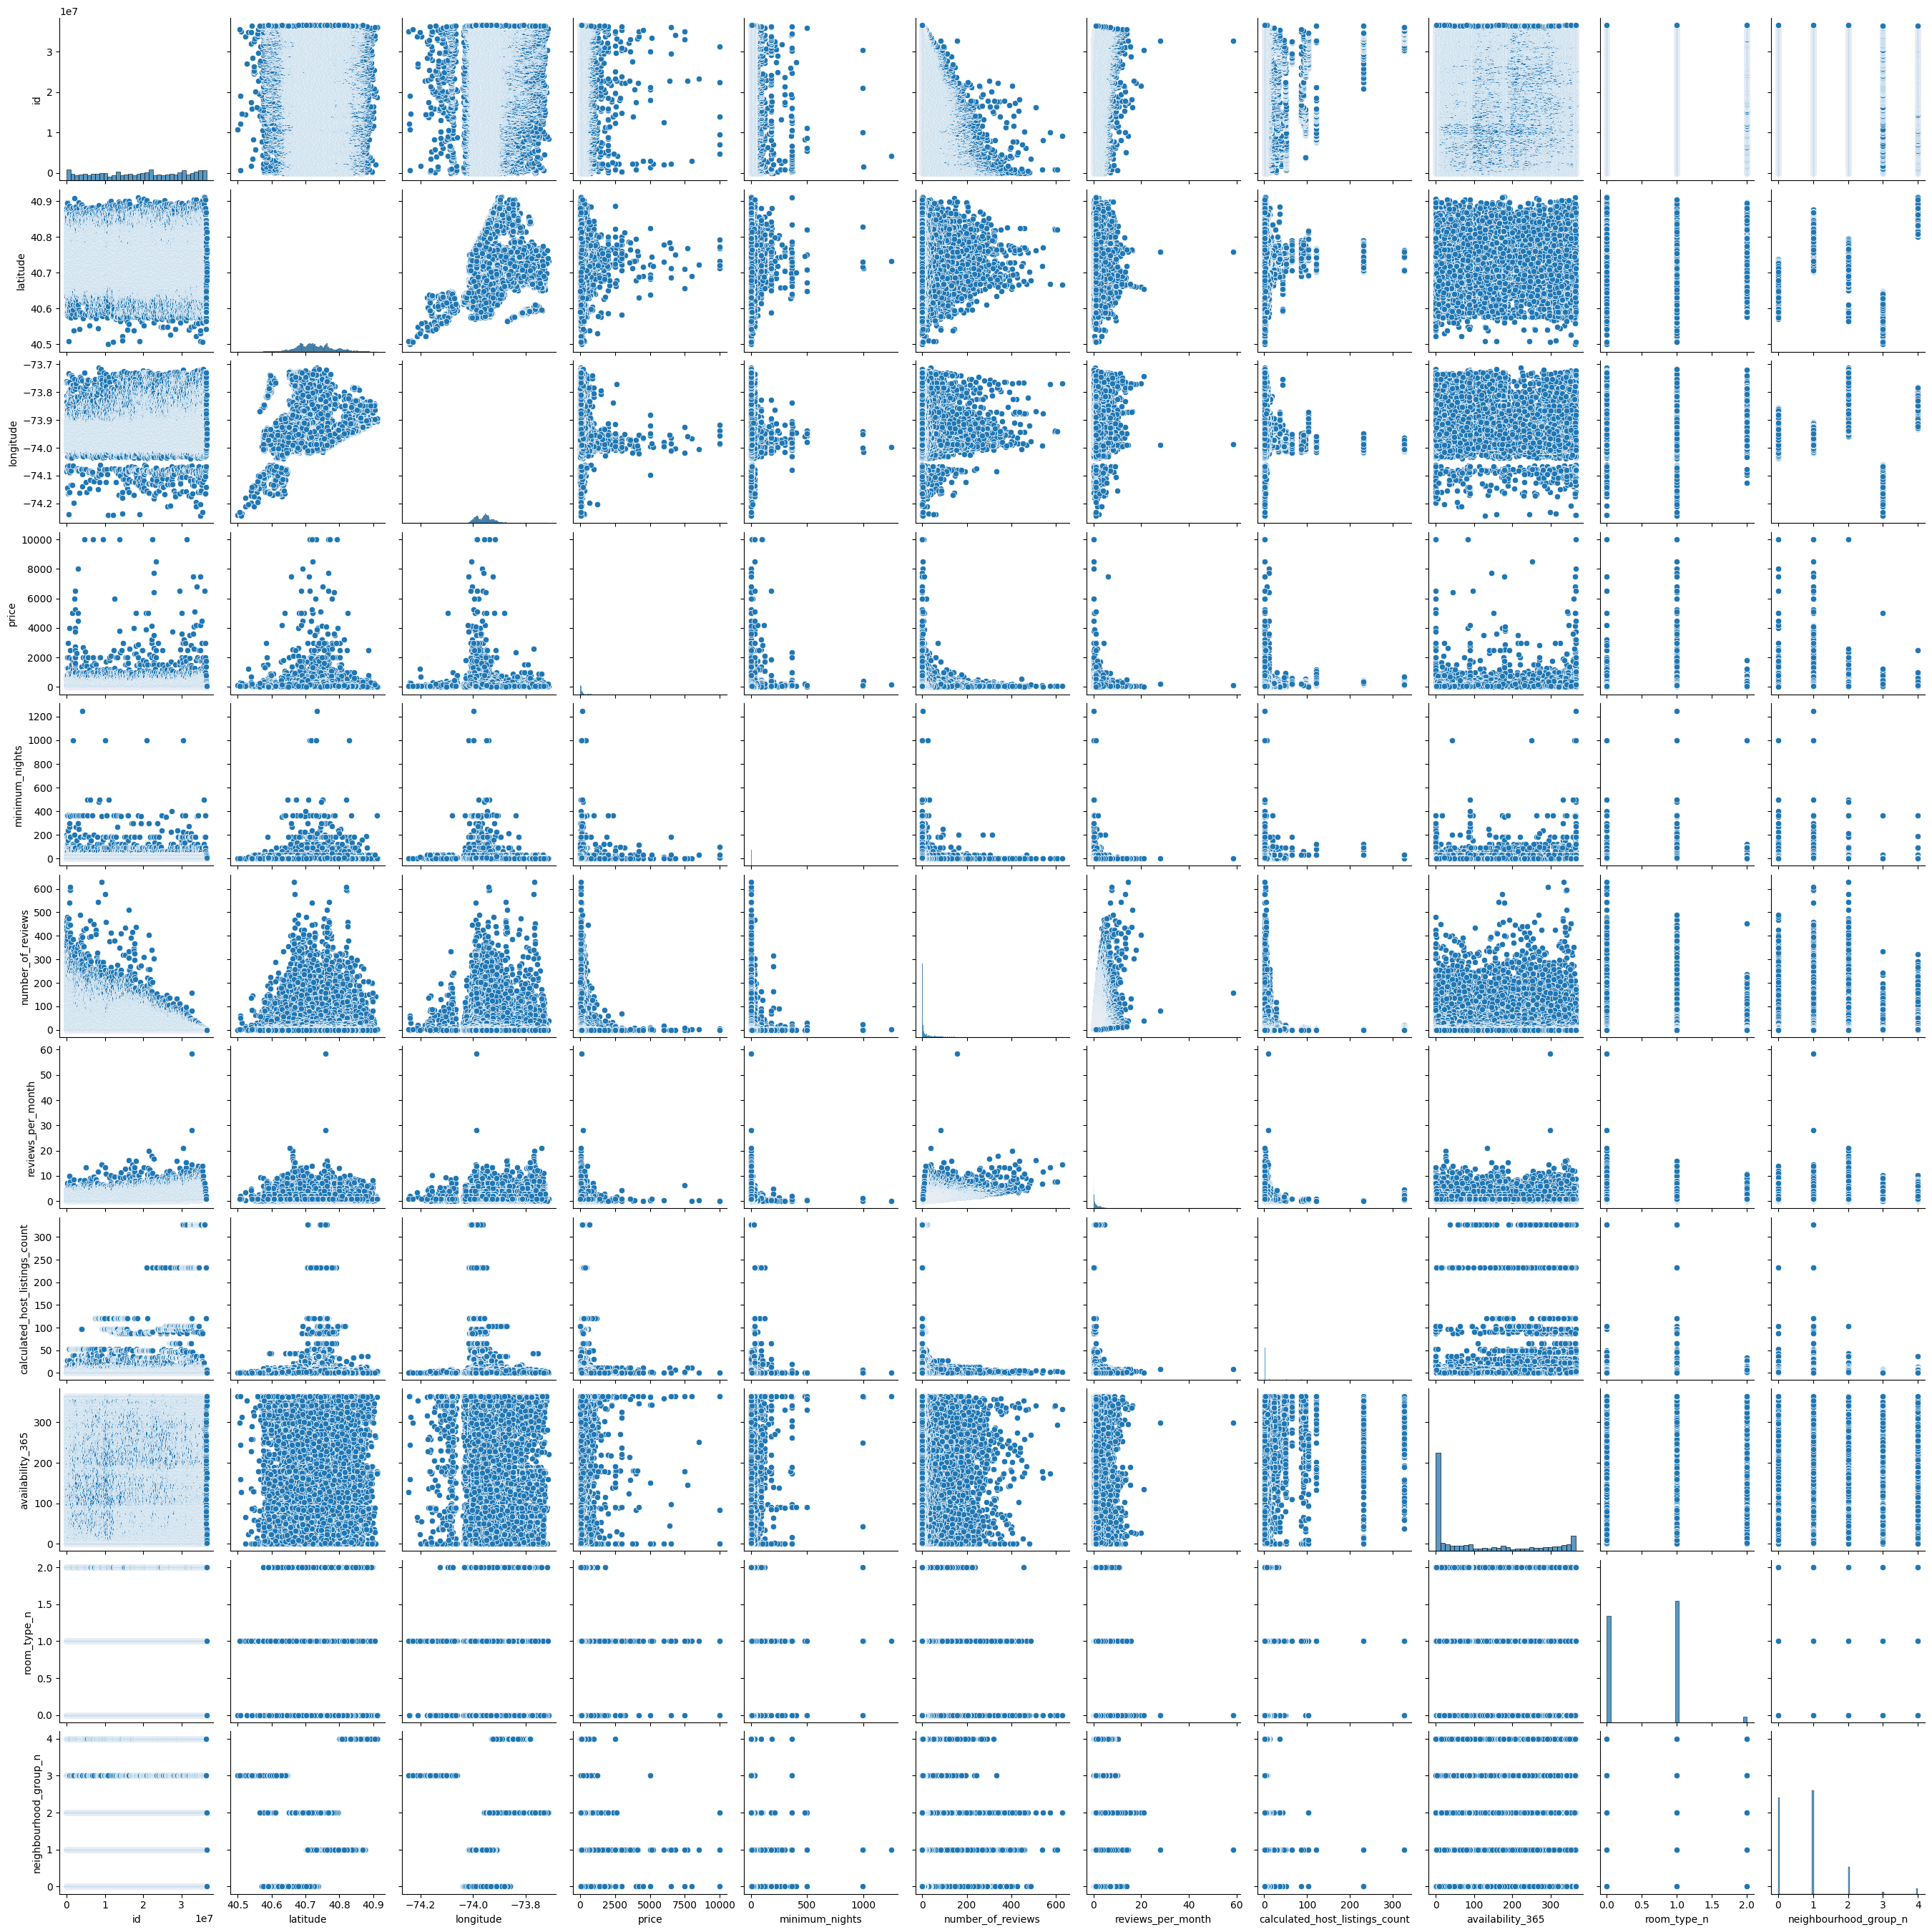

In [12]:
# matriz de gráficos de dispersión
sns.pairplot(Abnb_df)
plt.show()

#### - Análisis de valores atípicos

In [13]:
# Análisis descriptivo 
Abnb_df.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_n,neighbourhood_group_n
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327,0.567113,0.786911
std,1.098311e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289,0.541249,0.844386
min,2.539000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000
25%,9.471945e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,0.000000,0.000000
50%,1.967728e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000,1.000000,1.000000
75%,2.915218e+07,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000,1.000000,1.000000
max,3.648724e+07,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,2.000000,4.000000


In [14]:
# Eliminar valores con valor cero en alguna columna en este caso "price"
Abnb_df = Abnb_df[Abnb_df['price'] != 0]
Abnb_df.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_n,neighbourhood_group_n
count,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,38833.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,1.901679e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.373128,7.144628,112.779498,0.567118,0.786986
std,1.098432e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.680391,32.956185,131.627271,0.541183,0.844288
min,2.539000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000
25%,9.470548e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,0.000000,0.000000
50%,1.967574e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000,1.000000,1.000000
75%,2.915297e+07,40.763120,-73.936290,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000,1.000000,1.000000
max,3.648724e+07,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,2.000000,4.000000


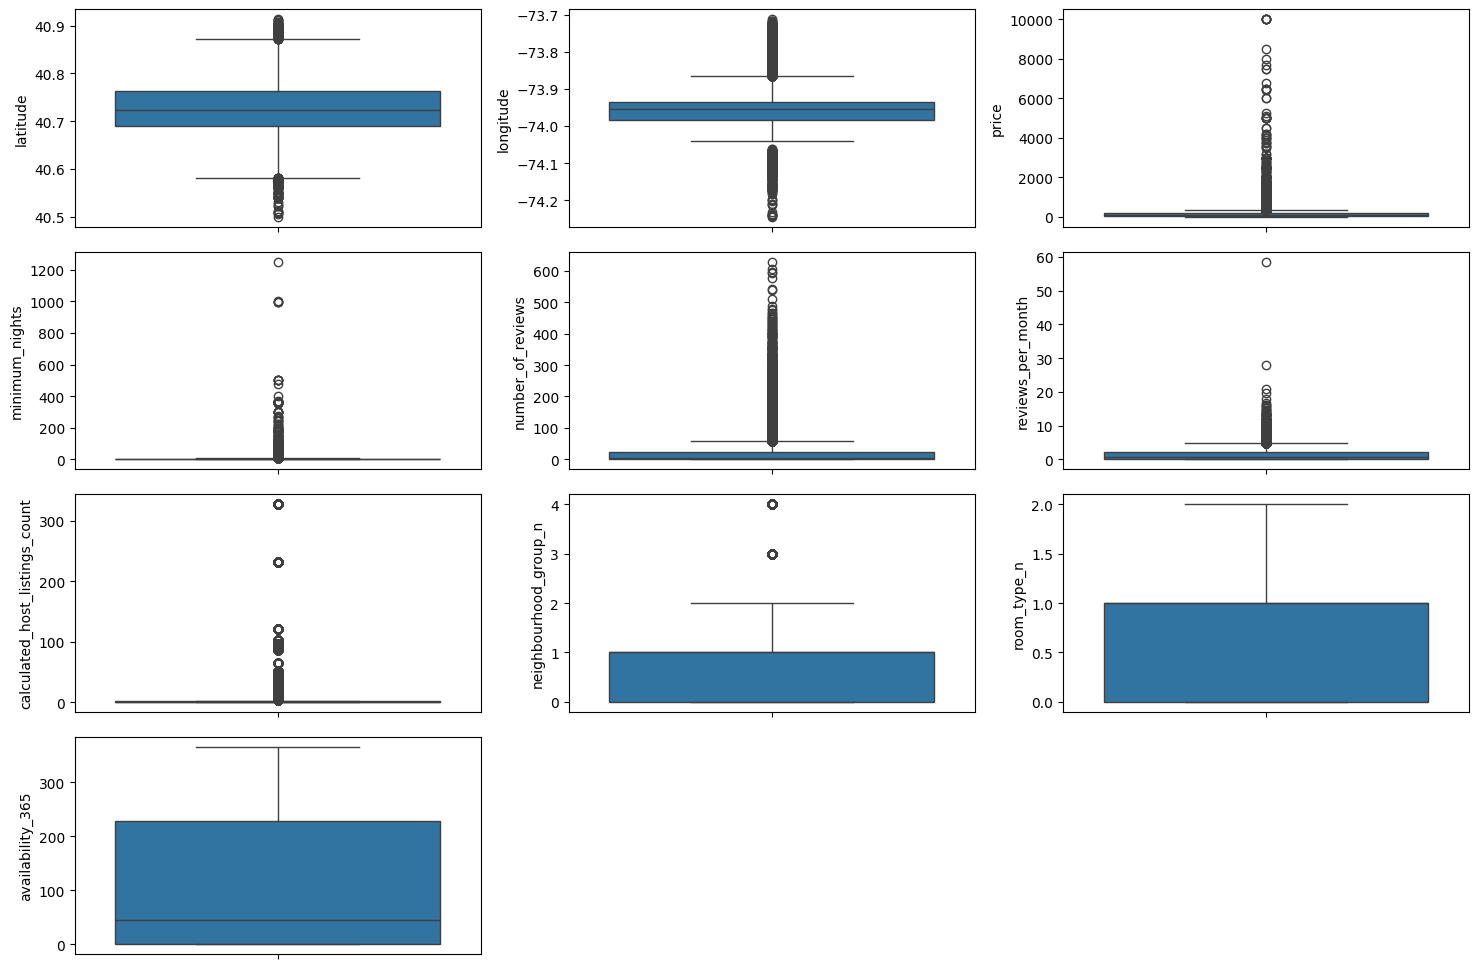

In [15]:
# Diagramas de cajas de las variables
fig, axis = plt.subplots(4, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = Abnb_df, y = "latitude")
sns.boxplot(ax = axis[0, 1], data = Abnb_df, y = "longitude")
sns.boxplot(ax = axis[0, 2], data = Abnb_df, y = "price")
sns.boxplot(ax = axis[1, 0], data = Abnb_df, y = "minimum_nights")
sns.boxplot(ax = axis[1, 1], data = Abnb_df, y = "number_of_reviews")
sns.boxplot(ax = axis[1, 2], data = Abnb_df, y = "reviews_per_month")
sns.boxplot(ax = axis[2, 0], data = Abnb_df, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[2, 1], data = Abnb_df, y = "neighbourhood_group_n")
sns.boxplot(ax = axis[2, 2], data = Abnb_df, y = "room_type_n")
sns.boxplot(ax = axis[3, 0], data = Abnb_df, y = "availability_365")

plt.tight_layout()
fig.delaxes(axis[3, 1])
fig.delaxes(axis[3, 2])
plt.show()

In [16]:
# Calcular las estadísticas descriptivas para las columnas "price" y "minimum_nights"
fare_stats = Abnb_df[["price", "minimum_nights"]].describe()
fare_stats

,price,minimum_nights
count,48884.000000,48884.000000
mean,152.755053,7.029887
std,240.170260,20.512224
min,10.000000,1.000000
25%,69.000000,1.000000
50%,106.000000,3.000000
75%,175.000000,5.000000
max,10000.000000,1250.000000


#### - Calcular los límites superior e inferior para identificar outliers

In [17]:
# Calcular el rango intercuartílico (IQR)
fare_iqr_price = fare_stats.loc["75%", "price"] - fare_stats.loc["25%", "price"]
fare_iqr_nights = fare_stats.loc["75%", "minimum_nights"] - fare_stats.loc["25%", "minimum_nights"]

# Calcular los límites superior e inferior para identificar outliers
upper_limit_price = fare_stats.loc["75%", "price"] + 1.5 * fare_iqr_price
lower_limit_price = fare_stats.loc["25%", "price"] - 1.5 * fare_iqr_price

upper_limit_nights = fare_stats.loc["75%", "minimum_nights"] + 1.5 * fare_iqr_nights
lower_limit_nights = fare_stats.loc["25%", "minimum_nights"] - 1.5 * fare_iqr_nights

print(f"Los límites superior e inferior para encontrar valores atípicos en 'price' son  {round(upper_limit_price, 2)} and {round(lower_limit_price, 2)}, con un rango intercuartílico de {round(fare_iqr_price, 2)}")
print(f"Los límites superior e inferior para encontrar valores atípicos en 'minimum_nights' son {round(upper_limit_nights, 2)} and {round(lower_limit_nights, 2)}, con un rango intercuartílico de {round(fare_iqr_nights, 2)}")


Los límites superior e inferior para encontrar valores atípicos en 'price' son  334.0 and -90.0, con un rango intercuartílico de 106.0
Los límites superior e inferior para encontrar valores atípicos en 'minimum_nights' son 11.0 and -5.0, con un rango intercuartílico de 4.0


#### - Análisis de valores faltantes

In [18]:
#  Cantidad de valores faltantes
Abnb_df_ = Abnb_df.isnull().sum().sort_values(ascending=False)
Abnb_df_

reviews_per_month                 10051
id                                    0
neighbourhood_group                   0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
room_type_n                           0
neighbourhood_group_n                 0
dtype: int64

In [19]:
# Porcentaje de valores faltantes en cada columna
Abnb_df.isnull().sum().sort_values(ascending=False) / len(Abnb_df_)

reviews_per_month                 773.153846
id                                  0.000000
neighbourhood_group                 0.000000
latitude                            0.000000
longitude                           0.000000
room_type                           0.000000
price                               0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
calculated_host_listings_count      0.000000
availability_365                    0.000000
room_type_n                         0.000000
neighbourhood_group_n               0.000000
dtype: float64

In [20]:
# Imputación numérica sobre "reviews_per_month"
# optando en este caso por la mediana ya que no se ve afectada por los valores extremos
Abnb_df["reviews_per_month"].fillna(Abnb_df["reviews_per_month"].median(), inplace = True)

# Tambien se puede hacer con la moda y media de la columna 
# Abnb_df["reviews_per_month"].fillna(Abnb_df["reviews_per_month"].mode()[0], inplace = True)
# Abnb_df["reviews_per_month"].fillna(Abnb_df["reviews_per_month"].mean(), inplace = True)

Abnb_df.isnull().sum()

id                                0
neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
room_type_n                       0
neighbourhood_group_n             0
dtype: int64

In [21]:
# Inferencia de nuevas características, en este caso creamos la columna 'coordinates' como cadena (latitude, longitude)
Abnb_df['coordinates'] = Abnb_df['latitude'].astype(str) + ', ' + Abnb_df['longitude'].astype(str)
Abnb_df


,id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_n,neighbourhood_group_n,coordinates
0,2539,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,0,0,"40.64749, -73.97237"
1,2595,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,1,1,"40.75362, -73.98377"
2,3647,Manhattan,40.80902,-73.94190,Private room,150,3,0,0.72,1,365,0,1,"40.80902, -73.9419"
3,3831,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,1,0,"40.68514, -73.95976"
4,5022,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,1,1,"40.79851, -73.94399"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Brooklyn,40.67853,-73.94995,Private room,70,2,0,0.72,2,9,0,0,"40.67853, -73.94995"
48891,36485057,Brooklyn,40.70184,-73.93317,Private room,40,4,0,0.72,2,36,0,0,"40.70184, -73.93317"
48892,36485431,Manhattan,40.81475,-73.94867,Entire home/apt,115,10,0,0.72,1,27,1,1,"40.81475, -73.94867"
48893,36485609,Manhattan,40.75751,-73.99112,Shared room,55,1,0,0.72,6,2,2,1,"40.75751, -73.99112"


#### - Escalado de características

In [22]:
# Normalización
from sklearn.preprocessing import StandardScaler

num_variables = ["neighbourhood_group_n", "latitude", "longitude", "room_type_n", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]

scaler = StandardScaler()
norm_features = scaler.fit_transform(Abnb_df[num_variables])
total_Abnb_norm = pd.DataFrame(norm_features, index = Abnb_df.index, columns = num_variables)
total_Abnb_norm["price"] = Abnb_df["price"] # Variable objetivo por eso la dejamos fuera de la normalización
total_Abnb_norm.head()

,neighbourhood_group_n,latitude,longitude,room_type_n,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,-0.932139,-1.493872,-0.437504,-1.047934,-0.293969,-0.320353,-0.676524,-0.034732,1.916192,149
1,0.252303,0.452352,-0.684480,0.799890,-0.293969,0.487712,-0.564739,-0.156107,1.840219,225
2,0.252303,1.468284,0.222616,-1.047934,-0.196465,-0.522369,-0.341168,-0.186450,1.916192,150
3,-0.932139,-0.803442,-0.164313,0.799890,-0.293969,5.538118,2.236470,-0.186450,0.617056,89
4,0.252303,1.275551,0.177337,0.799890,0.144799,-0.320353,-0.748856,-0.186450,-0.856818,80


In [23]:
# Escala mín.-máx
from sklearn.preprocessing import MinMaxScaler

num_variables = ["neighbourhood_group_n", "latitude", "longitude", "room_type_n", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(Abnb_df[num_variables])
total_data_scal = pd.DataFrame(scal_features, index = Abnb_df.index, columns = num_variables)
total_data_scal["price"] = Abnb_df["price"]
total_data_scal.head()

,neighbourhood_group_n,latitude,longitude,room_type_n,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,0.00,0.357393,0.511921,0.0,0.000000,0.014308,0.003419,0.015337,1.000000,149
1,0.25,0.614199,0.490469,0.5,0.000000,0.071542,0.006326,0.003067,0.972603,225
2,0.25,0.748252,0.569257,0.0,0.001601,0.000000,0.012139,0.000000,1.000000,150
3,0.00,0.448496,0.535649,0.5,0.000000,0.429253,0.079159,0.000000,0.531507,89
4,0.25,0.722820,0.565324,0.5,0.007206,0.014308,0.001539,0.000000,0.000000,80


#### - Selección de funciones
Prueba estadística suele ser un ANOVA o un Chi-cuadrado:

In [24]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

# Dividimos el conjunto de datos en muestras de entrenamiento y de prueba.
X = total_data_scal.drop("price", axis = 1)
y = total_data_scal["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Con un valor de k = 5 queremos decir implícitamente que queremos eliminar 2 características del conjunto de datos
selection_model = SelectKBest(chi2, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()

# transformación selectiva a las características del conjunto de entrenamiento (X_train)
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])

# transformación selectiva en el conjunto de prueba (X_test)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])


In [25]:
# Entrenamiento
X_train_sel.head()

,neighbourhood_group_n,room_type_n,number_of_reviews,calculated_host_listings_count,availability_365
0,0.50,0.5,0.009539,0.000000,0.101370
1,0.00,0.0,0.007949,0.000000,0.000000
2,1.00,0.0,0.011129,0.000000,0.191781
3,0.25,0.0,0.001590,0.000000,0.000000
4,0.00,0.0,0.000000,0.009202,0.000000


In [26]:
# Prueba
X_test_sel.head()

,neighbourhood_group_n,room_type_n,number_of_reviews,calculated_host_listings_count,availability_365
0,0.25,0.0,0.006359,0.009202,0.079452
1,0.25,0.0,0.174881,0.009202,0.649315
2,0.00,0.5,0.015898,0.021472,0.265753
3,0.25,0.0,0.001590,0.000000,0.000000
4,0.25,0.0,0.000000,0.003067,1.000000


In [27]:
# Agregar la columna "price" a los conjuntos de datos seleccionados X_train_sel y X_test_sel
# Llenando esa columna con los valores de las variables objetivo (y_train y y_test)
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)

### Paso 3: Guarda el conjunto de datos procesado
Después del EDA puedes guardar los datos en la carpeta ./data/processed. Asegúrate de agregar la carpeta de los datos en el .gitignore. Los datos al igual que los modelos no se deben subir a git.

In [28]:
X_train_sel.to_csv("/workspaces/machine-learning-python-template-pilarzarco/data/clean_titanic_train.csv", index=False)
X_test_sel.to_csv("/workspaces/machine-learning-python-template-pilarzarco/data/clean_titanic_test.csv", index=False)

In [29]:
# Asumiendo que Abnb_df es tu DataFrame procesado
# Este código guardará tu DataFrame procesado como un archivo CSV en la ruta especificada.
ruta_guardado = "/workspaces/machine-learning-python-template-pilarzarco/data/processed/Abnb_dataset_procesado.csv"
Abnb_df.to_csv(ruta_guardado, index=False)

# Asegúrate de que tu archivo .gitignore incluya la línea correspondiente a la carpeta ./data/processed.
# Si aún no tienes un archivo .gitignore, créalo en la raíz de tu proyecto y agrega la siguiente línea:, en el bash: /data/processed/

